# Feature Selection

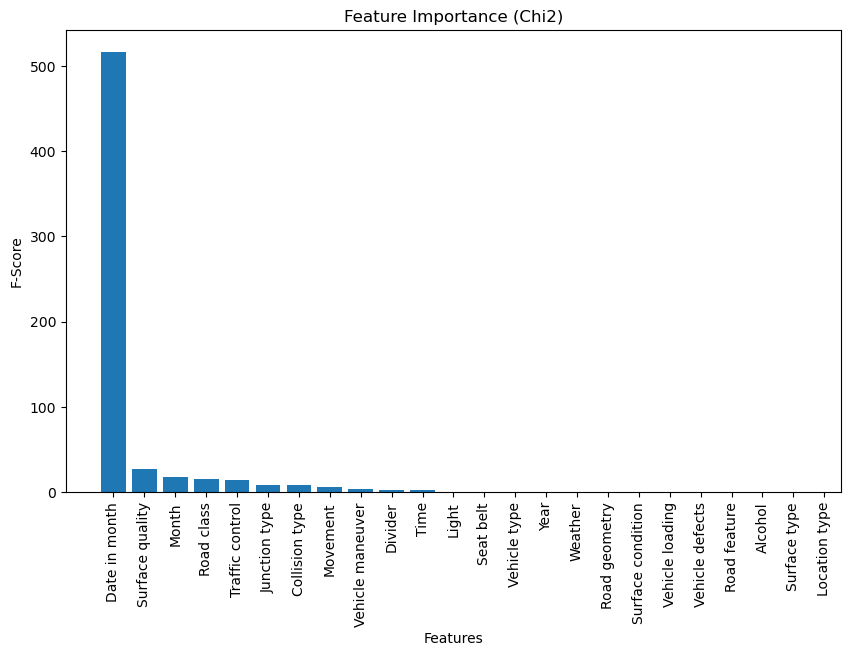

Feature Importance (Chi2):
             Feature     F-Score
0      Date in month  516.164955
14   Surface quality   27.571268
1              Month   17.378458
15        Road class   15.908534
5    Traffic control   14.855419
4      Junction type    8.965821
6     Collision type    8.776493
7           Movement    5.805187
19  Vehicle maneuver    3.741305
8            Divider    2.658545
3               Time    2.639227
10             Light    0.804987
23         Seat belt    0.799094
18      Vehicle type    0.671695
2               Year    0.670026


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

accident_data = pd.read_csv(r"D:\Accident Prediction\Publication 2023\Preparing the raw dataset\final_accident_data.csv")

# Data Encoding
X = accident_data.drop(columns="Accident severity")  # Set the independent variables
y = accident_data["Accident severity"]  # Set the target variable

# Encoding categorical features using OrdinalEncoder
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Split the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform chi2 feature selection and get the f-scores
f_scores, p_values = chi2(X_train, y_train)

# Create a DataFrame to store the feature names and corresponding f-scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})

# Sort the DataFrame by f-scores in descending order
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Plotting the feature scores in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['F-Score'])
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('Feature Importance (Chi2)')
plt.xticks(rotation=90)
plt.show()

# Print the feature scores in descending order
print("Feature Importance (Chi2):")
print(feature_scores.head(15)) # printing important features

In [2]:
feature_scores.iloc[15:, 0] # features that are not important

9               Weather
11        Road geometry
12    Surface condition
20      Vehicle loading
21      Vehicle defects
16         Road feature
22              Alcohol
13         Surface type
17        Location type
Name: Feature, dtype: object